# Loading and Viewing the Data

In [1]:
#Name: Berke Derin Berktay
#First, we need to import the necessary libraries that we are going to use further on into the study
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
#we first read the excel file's sheet labelled as 'ChildCareCentres'
df = pd.read_excel('INF2178_A2_data.xlsx', 'ChildCareCentres')
df

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,1059,14492,The Neighbourhood Group Downsview Child Care,Non Profit Agency,2829 KEELE ST,M3M 2G7,6,Public Elementary School,Downsview Public School,0,0,0,52,60,112,Y,Y
1059,1060,14496,Lawrence Park School,Non Profit Agency,2180 BAYVIEW AVE,M4N 3K7,15,Other,NaN,0,25,35,0,0,60,N,N
1060,1061,14497,The Munchkin Manor Daycare & Early Learning Ce...,Non Profit Agency,525 BLOOR ST E,M4W 1J1,13,Other,Place Of Worship,0,25,24,0,0,49,N,N
1061,1062,14501,Columbus Early Learning Centres - Regina Mundi,Non Profit Agency,60 PLAYFAIR AVE,M6B 2P9,8,Catholic Elementary School,Regina Mundi Catholic School,0,0,0,26,30,56,Y,Y


In [2]:
df.head #let us try to get the sense of the data by simply observing it

<bound method NDFrame.head of        _id  LOC_ID                                           LOC_NAME  \
0        1    1013              Lakeshore Community Child Care Centre   
1        2    1014            Alternative Primary School Parent Group   
2        3    1015     Cardinal Leger Child Care Centre (Scarborough)   
3        4    1016  George Brown - Richmond Adelaide Childcare Centre   
4        5    1017  Woodland Nursery School (Warden Woods Communit...   
...    ...     ...                                                ...   
1058  1059   14492       The Neighbourhood Group Downsview Child Care   
1059  1060   14496                               Lawrence Park School   
1060  1061   14497  The Munchkin Manor Daycare & Early Learning Ce...   
1061  1062   14501     Columbus Early Learning Centres - Regina Mundi   
1062  1063   14504                             Brightpath Leslieville   

                AUSPICE            ADDRESS    PCODE  ward  \
0     Non Profit Agency     101 

# Checking zero and null values

In [3]:
#First, let us perform some data wrangling to ensure that our data at hand is top notch.
#Let us check the amount of null and 0 values for each variable to see if we should replace or delete 
#some of these values/columns if there are too many or too little missing.
def emptyandzero(df):
    empty_cells = df.isna().sum()
    print("EMPTY CELL COUNTS:")
    print(empty_cells)
    
    numerics = df.select_dtypes(include=np.number)
    zeroes = []
    for i in range(len(numerics.columns)):
        zeroes.append(numerics.columns[i])
        zeroes.append((numerics[numerics.columns[i]] == 0).sum())
    print("\nZERO CELL COUNTS:")
    print(zeroes)
    

In [4]:
emptyandzero(df)

EMPTY CELL COUNTS:
_id              0
LOC_ID           0
LOC_NAME         0
AUSPICE          0
ADDRESS          0
PCODE            0
ward             0
bldg_type        0
BLDGNAME       348
IGSPACE          0
TGSPACE          0
PGSPACE          0
KGSPACE          0
SGSPACE          0
TOTSPACE         0
subsidy          0
cwelcc_flag      0
dtype: int64

ZERO CELL COUNTS:
['_id', 0, 'LOC_ID', 0, 'ward', 0, 'IGSPACE', 704, 'TGSPACE', 393, 'PGSPACE', 209, 'KGSPACE', 602, 'SGSPACE', 558, 'TOTSPACE', 0]


# Feature Engineering

In [5]:
#Now, let us perform some feature engineering to see if we can delete some useless columns and/or create useful ones

In [6]:
#Throughout the analysis, it is pointless to keep several columns that we do not need to address our research questions.
df = df.drop(['LOC_ID'], axis=1)
df = df.drop(['LOC_NAME'], axis=1)
df = df.drop(['ADDRESS'], axis=1)
df = df.drop(['PCODE'], axis=1)
df = df.drop(['BLDGNAME'], axis=1)

df.head #check with a random entry

<bound method NDFrame.head of        _id            AUSPICE  ward                   bldg_type  IGSPACE  \
0        1  Non Profit Agency     3    Public Elementary School        0   
1        2  Non Profit Agency     8    Public Elementary School        0   
2        3  Non Profit Agency    25  Catholic Elementary School        0   
3        4  Non Profit Agency    10                       Other       10   
4        5  Non Profit Agency    20         High Rise Apartment        0   
...    ...                ...   ...                         ...      ...   
1058  1059  Non Profit Agency     6    Public Elementary School        0   
1059  1060  Non Profit Agency    15                       Other        0   
1060  1061  Non Profit Agency    13                       Other        0   
1061  1062  Non Profit Agency     8  Catholic Elementary School        0   
1062  1063  Commercial Agency    14                       Other       30   

      TGSPACE  PGSPACE  KGSPACE  SGSPACE  TOTSPACE subsid

# Some Exploratory Data Analysis

In [7]:
#checking the distinct value sets for each column that we might look at
unique_entries1 = df['AUSPICE'].unique()
unique_entries2 = df['bldg_type'].unique()
unique_entries3 = df['subsidy'].unique()
unique_entries4 = df['cwelcc_flag'].unique()
print(unique_entries1)
print(unique_entries2)
print(unique_entries3)
print(unique_entries4)


['Non Profit Agency' 'Commercial Agency' 'Public (City Operated) Agency']
['Public Elementary School' 'Catholic Elementary School' 'Other'
 'High Rise Apartment' 'Community College/University' 'Public High School'
 'House' 'Purpose Built' 'Synagogue' 'Community/Recreation Centre'
 'Public (school closed)' 'Office Building'
 'Multi Human Services Facility' 'Place of Worship' 'Industrial Building'
 'Community/Rec Centre - City' 'Catholic High School' 'Church'
 'Commercial Building' 'Catholic Elementary (French)'
 'Public Elementary (French)' 'Hospital/Health Centre'
 'Low Rise Apartment' 'Public Middle School'
 'Community/Rec Centre - Private' 'Community Rec/Centre - Board Run'
 'Private Elementary School' 'Community/Rec Centre AOCC'
 'Community Health Centre' 'Public Elementary Special']
['Y' 'N']
['Y' 'N']


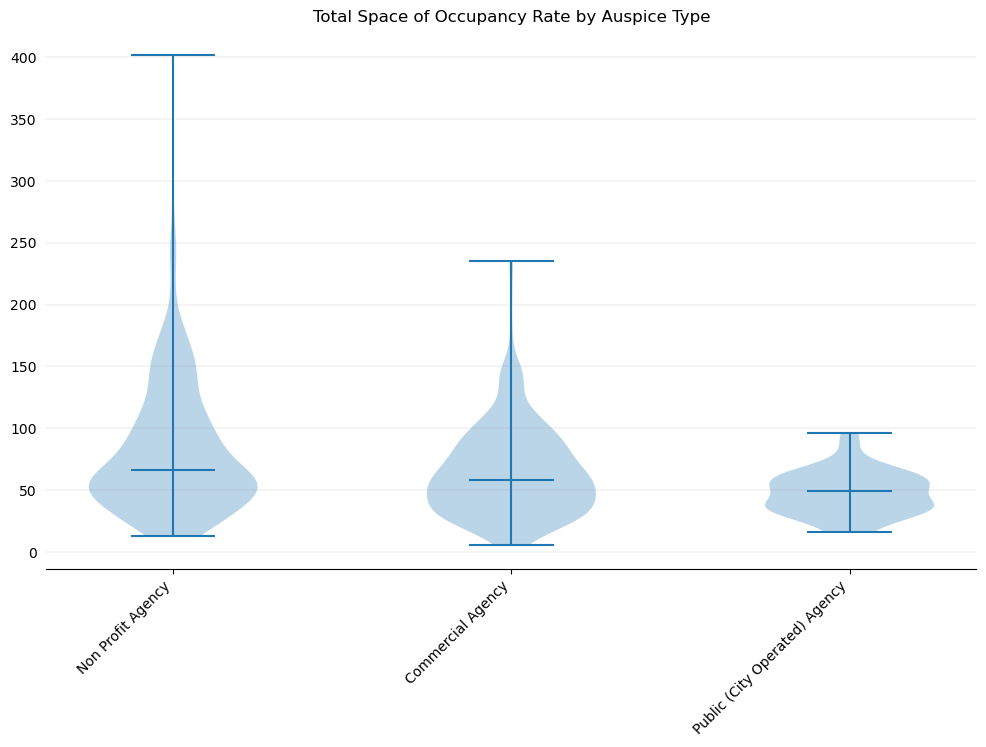

In [8]:
nonprofitagency = df[df['AUSPICE'] == 'Non Profit Agency']['TOTSPACE']
commercialagency = df[df['AUSPICE'] == 'Commercial Agency']['TOTSPACE']
publicagency = df[df['AUSPICE'] == 'Public (City Operated) Agency']['TOTSPACE']


#Let us graph the types of auspice vs total space
fig, ax = plt.subplots(figsize=(12, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

ax.set_title('Total Space of Occupancy Rate by Auspice Type')

dataset = [nonprofitagency, commercialagency, publicagency]

labels = df['AUSPICE'].unique()

ax.violinplot(dataset, showmeans=False, showmedians=True)
ax.set_xticks(range(1, len(labels) + 1))
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.show()


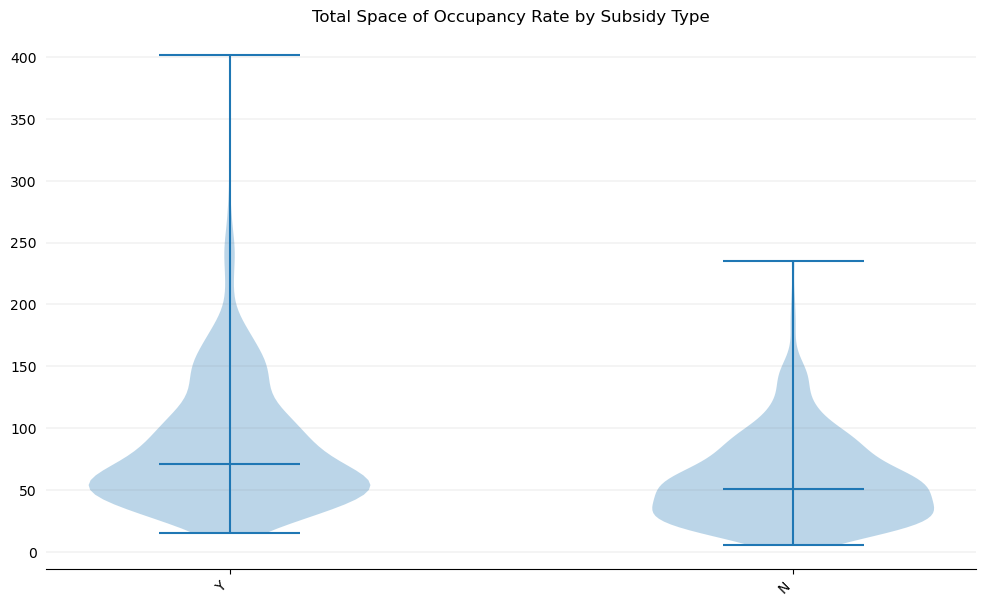

In [9]:
subsidyyes = df[df['subsidy'] == 'Y']['TOTSPACE']
subsidyno = df[df['subsidy'] == 'N']['TOTSPACE']

#Let us graph the types of subsidy vs total space
fig, ax = plt.subplots(figsize=(12, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

ax.set_title('Total Space of Occupancy Rate by Subsidy Type')

dataset = [subsidyyes, subsidyno]

labels = df['subsidy'].unique()

ax.violinplot(dataset, showmeans=False, showmedians=True)
ax.set_xticks(range(1, len(labels) + 1))
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.show()


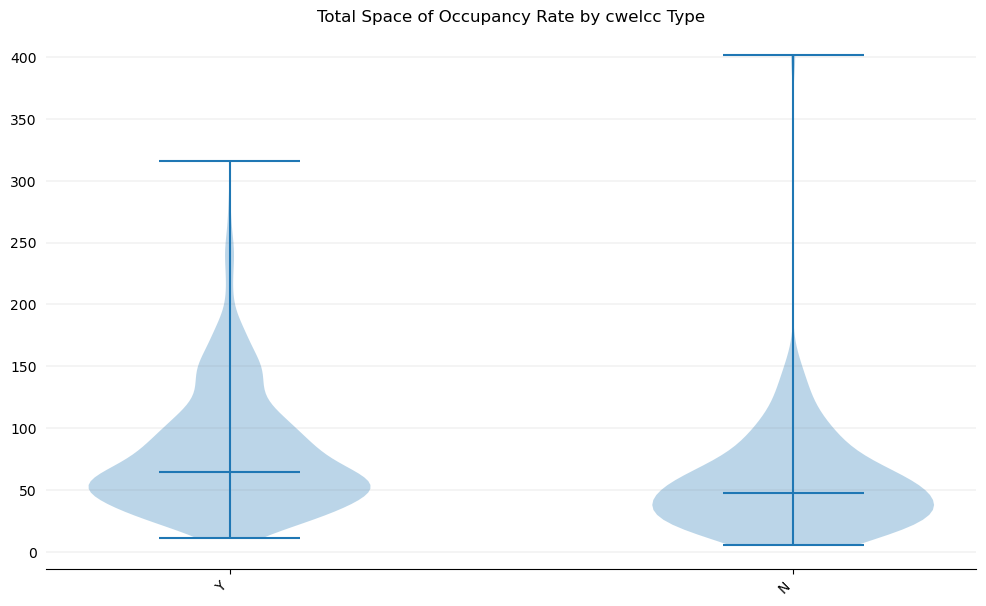

In [10]:
cwelccyes = df[df['cwelcc_flag'] == 'Y']['TOTSPACE']
cwelccno = df[df['cwelcc_flag'] == 'N']['TOTSPACE']

#Let us graph the types of subsidy vs total space
fig, ax = plt.subplots(figsize=(12, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

ax.set_title('Total Space of Occupancy Rate by cwelcc Type')

dataset = [cwelccyes, cwelccno]

labels = df['cwelcc_flag'].unique()

ax.violinplot(dataset, showmeans=False, showmedians=True)
ax.set_xticks(range(1, len(labels) + 1))
ax.set_xticklabels(labels, rotation=45, ha='right')

plt.show()


In [11]:

#Let us compute the EDA's

def summary_stats(label): #Baseline function that we will use for repetition prevention purposes
    
    mean = np.round(np.mean(label), 2)
    median = np.round(np.median(label), 2)
    minval = np.round(label.min(), 2)
    maxval = np.round(label.max(), 2)
    quartile1 = np.round(label.quantile(0.25), 2)
    quartile3 = np.round(label.quantile(0.75), 2)
    iqr = np.round(quartile3 - quartile1, 2) #computations for the EDA
    
    print('Min: %s' % minval)
    print('Max: %s' % maxval)
    print('Mean: %s' % mean)
    print('25th percentile: %s' % quartile1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile3)
    print('IQR : %s' % iqr)

In [12]:
print('\n Non profit agency summary statistics')
summary_stats(nonprofitagency)
print('\nCommercial agency summary statistics')
summary_stats(commercialagency)
print('\nPublic agency summary statistics')
summary_stats(publicagency)
print('\nSubsidized Group summary statistics')
summary_stats(subsidyyes)
print('\nNot Subsidized Group summary statistics')
summary_stats(subsidyno)
print('\ncwelcc group summary statistics')
summary_stats(cwelccyes)
print('\nNot cwelcc group summary statistics')
summary_stats(cwelccno)


 Non profit agency summary statistics
Min: 13
Max: 402
Mean: 82.1
25th percentile: 47.0
Median: 66.0
75th percentile: 109.0
IQR : 62.0

Commercial agency summary statistics
Min: 6
Max: 235
Mean: 64.98
25th percentile: 37.0
Median: 58.0
75th percentile: 85.0
IQR : 48.0

Public agency summary statistics
Min: 16
Max: 96
Mean: 47.77
25th percentile: 36.0
Median: 49.0
75th percentile: 62.0
IQR : 26.0

Subsidized Group summary statistics
Min: 15
Max: 402
Mean: 84.2
25th percentile: 49.0
Median: 71.0
75th percentile: 108.75
IQR : 59.75

Not Subsidized Group summary statistics
Min: 6
Max: 235
Mean: 57.93
25th percentile: 31.0
Median: 51.0
75th percentile: 76.0
IQR : 45.0

cwelcc group summary statistics
Min: 11
Max: 316
Mean: 78.78
25th percentile: 46.0
Median: 65.0
75th percentile: 101.0
IQR : 55.0

Not cwelcc group summary statistics
Min: 6
Max: 402
Mean: 54.68
25th percentile: 28.0
Median: 48.0
75th percentile: 65.0
IQR : 37.0


# One-Way ANOVA's

/Users/derinberktay/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


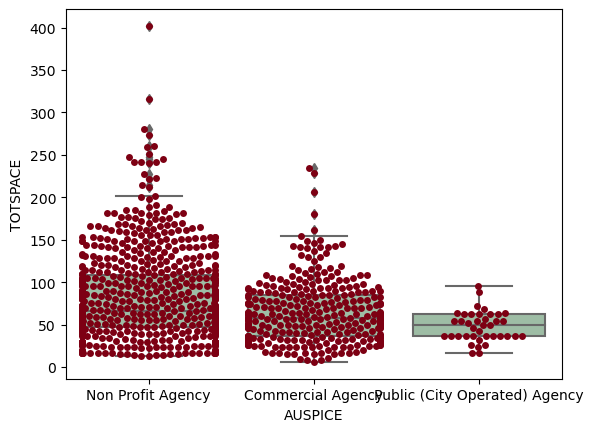

In [13]:
ax = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df, color='#99c2a2')
ax = sns.swarmplot(x="AUSPICE", y="TOTSPACE", data=df, color='#7d0013')
plt.show()
     

In [14]:
# Ordinary Least Squares (OLS) model
model = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


# ANOVA table
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [15]:
#post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary

/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mea

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non Profit Agency,Public (City Operated) Agency,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial Agency,Public (City Operated) Agency,17.215193,-1.453146,35.883531,3.060857,0.077966


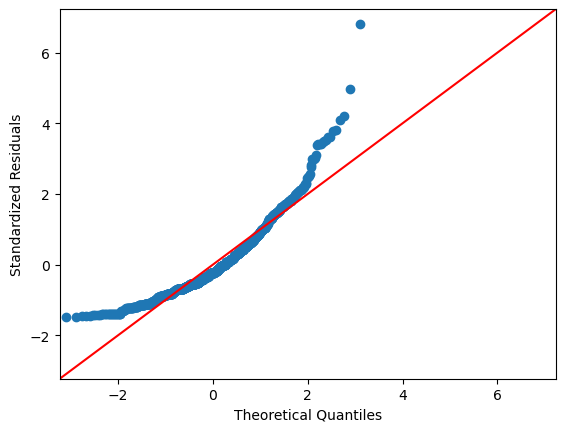

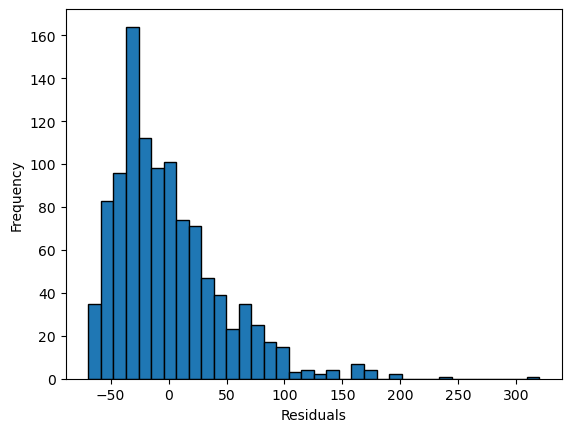

In [16]:
#checking model diagnostics
import statsmodels.api as sm
import matplotlib.pyplot as plt

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [17]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [18]:
from scipy.stats import bartlett
#assumption 2: variances are homoegenous: Bartlett's test when the sample is normally distributed
# Create separate lists for each auspice group's total space
groups = df.groupby('AUSPICE')['TOTSPACE'].apply(list)

# Perform Bartlett's test
test_statistic, p_value = bartlett(*groups)

print(f"Bartlett's test statistic: {test_statistic}, p-value: {p_value}")

k = df['AUSPICE'].nunique()

# The degrees of freedom for Bartlett's test:
df_bartlett = k - 1

print(f"Degrees of freedom for Bartlett's test: {df_bartlett}")
     

Bartlett's test statistic: 89.58603867335393, p-value: 3.520779884632816e-20
Degrees of freedom for Bartlett's test: 2


In [19]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary
     

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 35.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


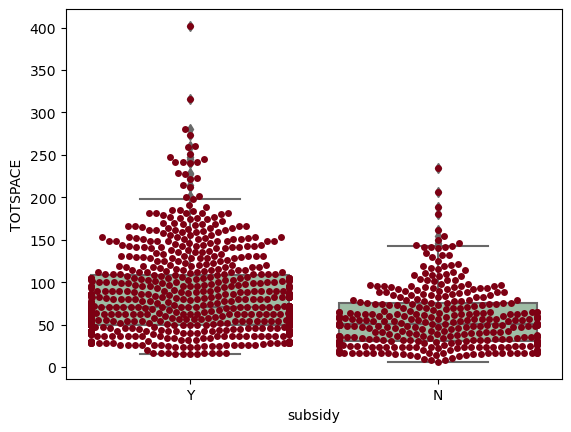

In [20]:
# Boxplot and swarmplot to visualize the distribution of TOTSPACE based on subsidy
ax = sns.boxplot(x='subsidy', y='TOTSPACE', data=df, color='#99c2a2')
ax = sns.swarmplot(x="subsidy", y="TOTSPACE", data=df, color='#7d0013')
plt.show()

In [21]:
# Ordinary Least Squares (OLS) model for TOTSPACE by subsidy
model = ols('TOTSPACE ~ C(subsidy)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# ANOVA table using bioinfokit's stat
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(subsidy)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(subsidy),1.0,1.607654e+05,160765.392950,75.227653,1.550892e-17
Residual,1061.0,2.267412e+06,2137.051825,NaN,NaN


In [22]:
# Post hoc test using Tukey's HSD for subsidy
res = stat()
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='subsidy', anova_model='TOTSPACE ~ C(subsidy)')
print(res.tukey_summary)

  group1 group2       Diff      Lower      Upper    q-value  p-value
0      Y      N  26.265831  20.323646  32.208016  12.266022    0.001


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


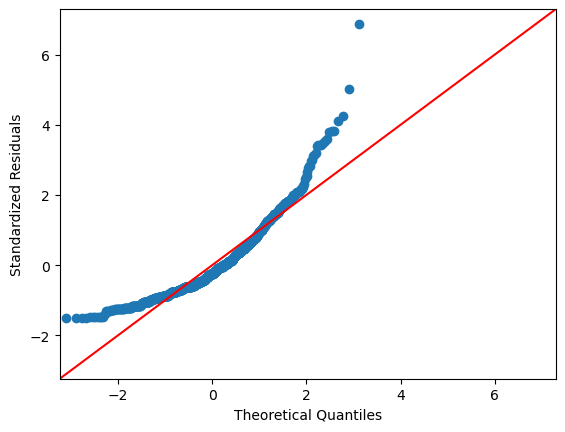

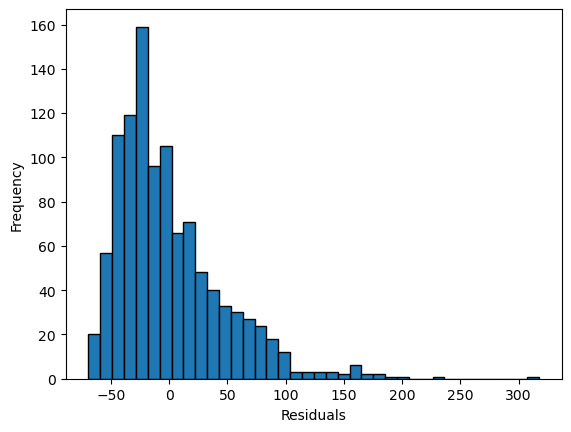

In [23]:
# Checking model diagnostics - Q-Q plot and histogram
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [24]:
# Shapiro Wilk test for normality of residuals
w, pvalue = stats.shapiro(model.resid)
print(f"Shapiro-Wilk test statistic: {w}, p-value: {pvalue}")

Shapiro-Wilk test statistic: 0.8925793766975403, p-value: 1.4240313682847578e-26


In [25]:
# Bartlett's test for homogeneity of variances between subsidy groups
groups = df.groupby('subsidy')['TOTSPACE'].apply(list)
test_statistic, p_value = bartlett(*groups)
print(f"Bartlett's test statistic: {test_statistic}, p-value: {p_value}")

Bartlett's test statistic: 49.081859352317615, p-value: 2.45500187845506e-12


In [26]:
# Degrees of freedom for Bartlett's test with subsidy
k_subsidy = df['subsidy'].nunique()
df_bartlett_subsidy = k_subsidy - 1
print(f"Degrees of freedom for Bartlett's test with subsidy: {df_bartlett_subsidy}")

Degrees of freedom for Bartlett's test with subsidy: 1


In [27]:
# Levene's test for homogeneity of variances between subsidy groups
res.levene(df=df, res_var='TOTSPACE', xfac_var='subsidy')
print(res.levene_summary)

                 Parameter    Value
0      Test statistics (W)  22.9889
1  Degrees of freedom (Df)   1.0000
2                  p value   0.0000


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


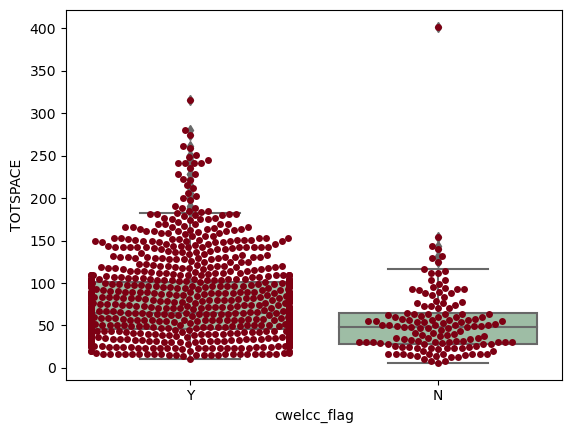

In [28]:
# Boxplot and swarmplot to visualize the distribution of TOTSPACE based on cwelcc_flag
ax = sns.boxplot(x='cwelcc_flag', y='TOTSPACE', data=df, color='#99c2a2')
ax = sns.swarmplot(x="cwelcc_flag", y="TOTSPACE", data=df, color='#7d0013')
plt.show()


In [29]:
# Ordinary Least Squares (OLS) model for TOTSPACE by cwelcc_flag
model = ols('TOTSPACE ~ C(cwelcc_flag)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                      sum_sq      df         F        PR(>F)
C(cwelcc_flag)  6.932701e+04     1.0  31.18297  2.982191e-08
Residual        2.358850e+06  1061.0       NaN           NaN


In [30]:
# ANOVA table using bioinfokit's stat
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(cwelcc_flag)')
print(res.anova_summary)

                    df        sum_sq       mean_sq         F        PR(>F)
C(cwelcc_flag)     1.0  6.932701e+04  69327.012662  31.18297  2.982191e-08
Residual        1061.0  2.358850e+06   2223.233145       NaN           NaN


In [31]:
# Post hoc test using Tukey's HSD for cwelcc_flag
res = stat()
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='cwelcc_flag', anova_model='TOTSPACE ~ C(cwelcc_flag)')
print(res.tukey_summary)

  group1 group2       Diff      Lower      Upper   q-value  p-value
0      Y      N  24.101945  15.632847  32.571043  7.897211    0.001


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


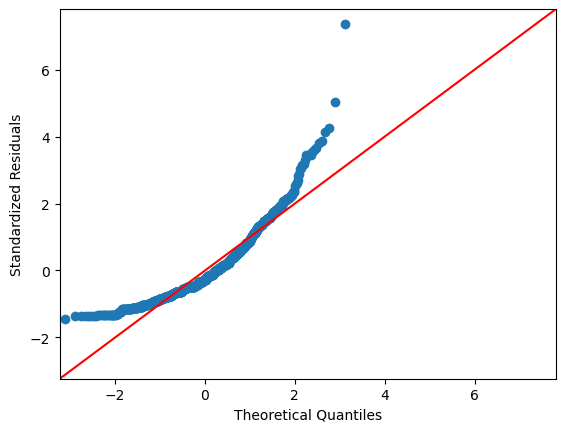

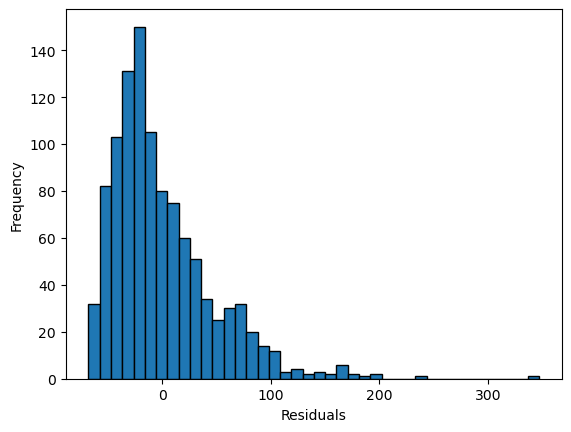

In [32]:
# Checking model diagnostics - Q-Q plot and histogram
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [33]:
# Shapiro Wilk test for normality of residuals
w, pvalue = stats.shapiro(model.resid)
print(f"Shapiro-Wilk test statistic: {w}, p-value: {pvalue}")

Shapiro-Wilk test statistic: 0.8836666941642761, p-value: 1.681973361296677e-27


In [34]:
# Bartlett's test for homogeneity of variances between cwelcc_flag groups
groups = df.groupby('cwelcc_flag')['TOTSPACE'].apply(list)
test_statistic, p_value = bartlett(*groups)
print(f"Bartlett's test statistic: {test_statistic}, p-value: {p_value}")

Bartlett's test statistic: 1.6715571945358458, p-value: 0.19605009086557704


In [35]:
# Degrees of freedom for Bartlett's test with cwelcc_flag
k_cwelcc_flag = df['cwelcc_flag'].nunique()
df_bartlett_cwelcc_flag = k_cwelcc_flag - 1
print(f"Degrees of freedom for Bartlett's test with cwelcc_flag: {df_bartlett_cwelcc_flag}")

Degrees of freedom for Bartlett's test with cwelcc_flag: 1


In [36]:
# Levene's test for homogeneity of variances between cwelcc_flag groups
res.levene(df=df, res_var='TOTSPACE', xfac_var='cwelcc_flag')
print(res.levene_summary)

                 Parameter   Value
0      Test statistics (W)  6.6573
1  Degrees of freedom (Df)  1.0000
2                  p value  0.0100


# Two-Way ANOVA's

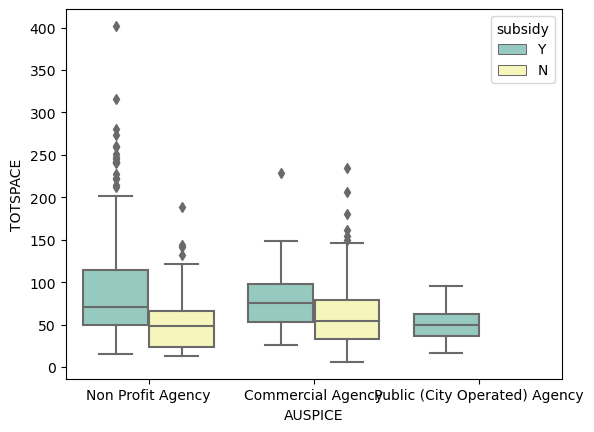

In [37]:
sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="subsidy", data=df, palette="Set3")
plt.show()



In [38]:
model = ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)



                             sum_sq      df          F        PR(>F)
C(AUSPICE)             2.421910e+02     2.0   0.058156  9.435061e-01
C(subsidy)             1.192246e+05     1.0  57.257129  8.291626e-14
C(AUSPICE):C(subsidy)  3.183621e+02     2.0   0.076446  7.822266e-01
Residual               2.203038e+06  1058.0        NaN           NaN


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [39]:

res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
print(res.anova_summary)


                           df        sum_sq        mean_sq          F  \
C(AUSPICE)                2.0  2.421910e+02     121.095486   0.058156   
C(subsidy)                1.0  1.192246e+05  119224.582872  57.257129   
C(AUSPICE):C(subsidy)     2.0  3.183621e+02     159.181060   0.076446   
Residual               1058.0  2.203038e+06    2082.266185        NaN   

                             PR(>F)  
C(AUSPICE)             9.435061e-01  
C(subsidy)             8.291626e-14  
C(AUSPICE):C(subsidy)  7.822266e-01  
Residual                        NaN  


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


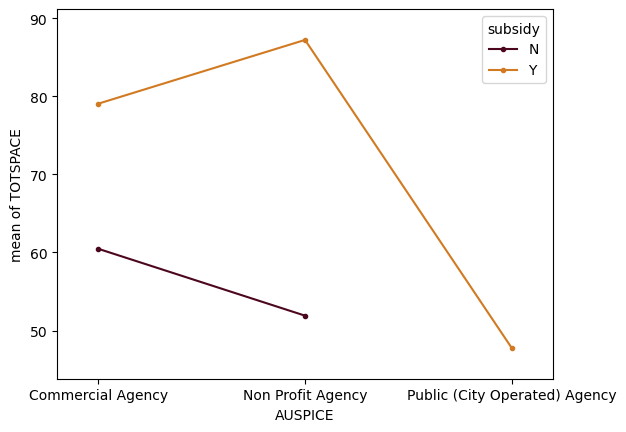

In [40]:

from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=df['AUSPICE'], trace=df['subsidy'], response=df['TOTSPACE'], colors=['#4c061d','#d17a22'])
plt.show()



In [41]:
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
print(res.tukey_summary)



              group1                         group2       Diff      Lower  \
0  Non Profit Agency              Commercial Agency  17.119417   9.703599   
1  Non Profit Agency  Public (City Operated) Agency  34.334610  16.224077   
2  Commercial Agency  Public (City Operated) Agency  17.215193  -1.453146   

       Upper   q-value   p-value  
0  24.535235  7.662434  0.001000  
1  52.445142  6.292710  0.001000  
2  35.883531  3.060857  0.077966  


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mea

In [42]:
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='subsidy', anova_model='TOTSPACE ~ C(subsidy)')
print(res.tukey_summary)



  group1 group2       Diff      Lower      Upper    q-value  p-value
0      Y      N  26.265831  20.323646  32.208016  12.266022    0.001


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


In [43]:
res.tukey_hsd(df=df,res_var='TOTSPACE',xfac_var=['AUSPICE','subsidy'], anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary.head()

/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future v

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",35.327657,21.376765,49.278548,10.224012,0.001000
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",8.165515,-7.513254,23.844284,2.102713,0.650319
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",26.764597,16.861011,36.668182,10.911306,0.001000
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",39.460387,17.933459,60.987315,7.400955,0.001000
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000


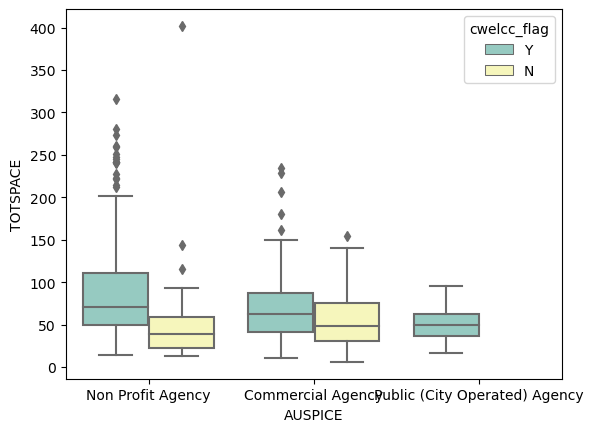

In [44]:
sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="cwelcc_flag", data=df, palette="Set3")
plt.show()


In [45]:
model = ols('TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                      sum_sq      df          F        PR(>F)
C(AUSPICE)      7.201242e+04     2.0  16.673931  7.417898e-08
C(cwelcc_flag)  4.522732e+04     1.0  20.944088  5.288385e-06
Residual        2.286838e+06  1059.0        NaN           NaN


In [46]:
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(cwelcc_flag)')
print(res.anova_summary)


                    df        sum_sq       mean_sq          F        PR(>F)
C(AUSPICE)         2.0  7.201242e+04  36006.212191  16.673931  7.417898e-08
C(cwelcc_flag)     1.0  4.522732e+04  45227.322754  20.944088  5.288385e-06
Residual        1059.0  2.286838e+06   2159.431484        NaN           NaN


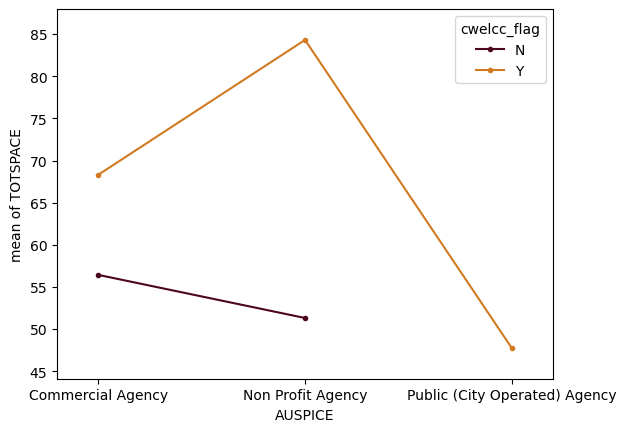

In [47]:
unique_cwelcc_flag_levels = df['cwelcc_flag'].nunique()
colors = ['#4c061d', '#d17a22'][:unique_cwelcc_flag_levels]  # Adjust based on unique levels

fig = interaction_plot(x=df['AUSPICE'], trace=df['cwelcc_flag'], response=df['TOTSPACE'], colors=colors)
plt.show()


In [48]:
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
print(res.tukey_summary)


              group1                         group2       Diff      Lower  \
0  Non Profit Agency              Commercial Agency  17.119417   9.703599   
1  Non Profit Agency  Public (City Operated) Agency  34.334610  16.224077   
2  Commercial Agency  Public (City Operated) Agency  17.215193  -1.453146   

       Upper   q-value   p-value  
0  24.535235  7.662434  0.001000  
1  52.445142  6.292710  0.001000  
2  35.883531  3.060857  0.077966  


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mea

In [49]:
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='cwelcc_flag', anova_model='TOTSPACE ~ C(cwelcc_flag)')
print(res.tukey_summary)


  group1 group2       Diff      Lower      Upper   q-value  p-value
0      Y      N  24.101945  15.632847  32.571043  7.897211    0.001


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


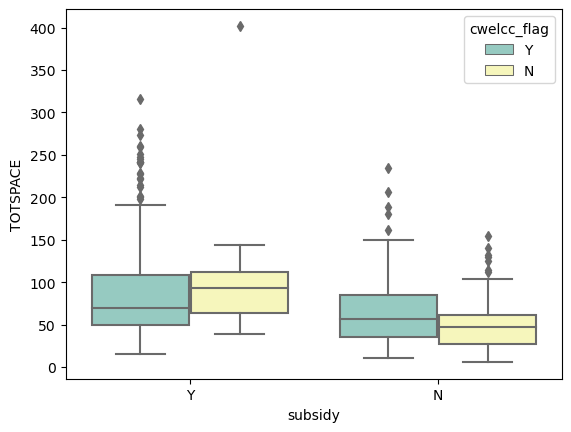

In [50]:
sns.boxplot(x="subsidy", y="TOTSPACE", hue="cwelcc_flag", data=df, palette="Set3")
plt.show()


In [51]:
model = ols('TOTSPACE ~ C(subsidy) + C(cwelcc_flag) + C(subsidy):C(cwelcc_flag)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                                 sum_sq      df          F        PR(>F)
C(subsidy)                 9.816181e+04     1.0  46.375040  1.633653e-11
C(cwelcc_flag)             6.723429e+03     1.0   3.176381  7.499648e-02
C(subsidy):C(cwelcc_flag)  1.910868e+04     1.0   9.027604  2.721895e-03
Residual                   2.241580e+06  1059.0        NaN           NaN


In [52]:
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(subsidy) + C(cwelcc_flag) + C(subsidy):C(cwelcc_flag)')
print(res.anova_summary)


                               df        sum_sq       mean_sq          F  \
C(subsidy)                    1.0  9.816181e+04  98161.809243  46.375040   
C(cwelcc_flag)                1.0  6.723429e+03   6723.428955   3.176381   
C(subsidy):C(cwelcc_flag)     1.0  1.910868e+04  19108.682949   9.027604   
Residual                   1059.0  2.241580e+06   2116.694877        NaN   

                                 PR(>F)  
C(subsidy)                 1.633653e-11  
C(cwelcc_flag)             7.499648e-02  
C(subsidy):C(cwelcc_flag)  2.721895e-03  
Residual                            NaN  


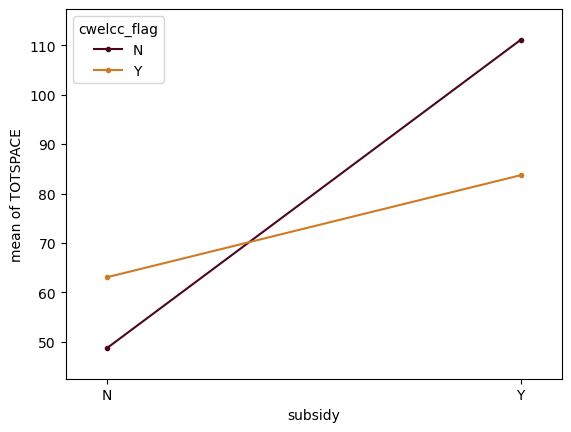

In [53]:
fig = interaction_plot(x=df['subsidy'], trace=df['cwelcc_flag'], response=df['TOTSPACE'], colors=['#4c061d','#d17a22'])
plt.show()


In [54]:
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='subsidy', anova_model='TOTSPACE ~ C(subsidy)')
print(res.tukey_summary)


  group1 group2       Diff      Lower      Upper    q-value  p-value
0      Y      N  26.265831  20.323646  32.208016  12.266022    0.001


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


In [55]:
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='cwelcc_flag', anova_model='TOTSPACE ~ C(cwelcc_flag)')
print(res.tukey_summary)


  group1 group2       Diff      Lower      Upper   q-value  p-value
0      Y      N  24.101945  15.632847  32.571043  7.897211    0.001


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


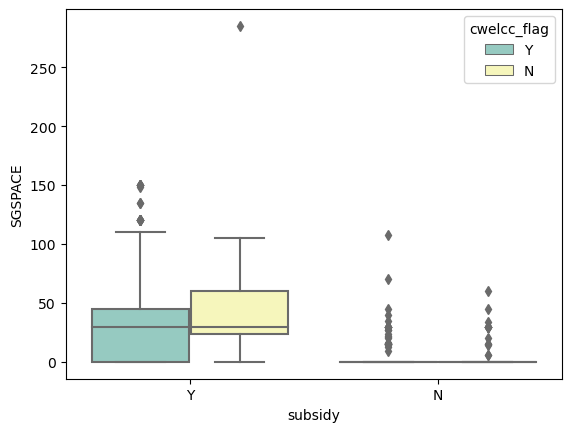

In [56]:
sns.boxplot(x="subsidy", y="SGSPACE", hue="cwelcc_flag", data=df, palette="Set3")
plt.show()


In [57]:
# model = ols('SGSPACE ~ C(subsidy) + C(cwelcc_flag) + C(subsidy):C(cwelcc_flag)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                                 sum_sq      df          F        PR(>F)
C(subsidy)                 9.816181e+04     1.0  46.375040  1.633653e-11
C(cwelcc_flag)             6.723429e+03     1.0   3.176381  7.499648e-02
C(subsidy):C(cwelcc_flag)  1.910868e+04     1.0   9.027604  2.721895e-03
Residual                   2.241580e+06  1059.0        NaN           NaN


In [58]:
res = stat()
res.anova_stat(df=df, res_var='SGSPACE', anova_model='SGSPACE ~ C(subsidy) + C(cwelcc_flag) + C(subsidy):C(cwelcc_flag)')
print(res.anova_summary)


                               df         sum_sq        mean_sq           F  \
C(subsidy)                    1.0  141017.145514  141017.145514  184.976568   
C(cwelcc_flag)                1.0    1408.473768    1408.473768    1.847539   
C(subsidy):C(cwelcc_flag)     1.0    8685.150906    8685.150906   11.392582   
Residual                   1059.0  807330.132897     762.351400         NaN   

                                 PR(>F)  
C(subsidy)                 6.029422e-39  
C(cwelcc_flag)             1.743593e-01  
C(subsidy):C(cwelcc_flag)  7.641314e-04  
Residual                            NaN  


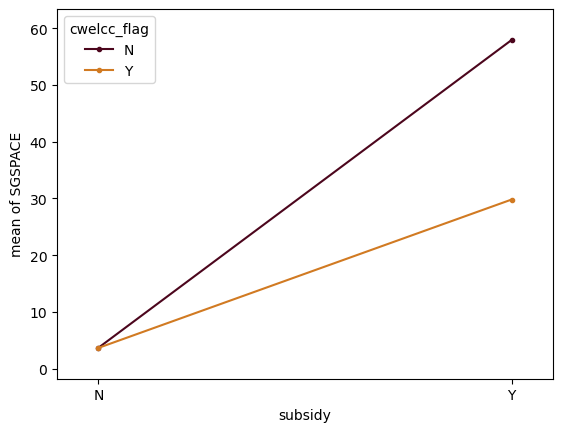

In [59]:
fig = interaction_plot(x=df['subsidy'], trace=df['cwelcc_flag'], response=df['SGSPACE'], colors=['#4c061d','#d17a22'])
plt.show()


In [60]:
res.tukey_hsd(df=df, res_var='SGSPACE', xfac_var='subsidy', anova_model='SGSPACE ~ C(subsidy)')
print(res.tukey_summary)


  group1 group2       Diff      Lower     Upper    q-value  p-value
0      Y      N  26.654007  23.086173  30.22184  20.730831    0.001


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


In [61]:
res.tukey_hsd(df=df, res_var='SGSPACE', xfac_var='cwelcc_flag', anova_model='SGSPACE ~ C(cwelcc_flag)')
print(res.tukey_summary)


  group1 group2       Diff     Lower      Upper   q-value  p-value
0      Y      N  14.744037  9.349548  20.138526  7.584464    0.001


/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/derinberktay/anaconda3/lib/python3.10/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
